# Intelligent Complaint Analysis for Financial Services

## Exploratory Data Analysis and Data Preprocessing
what we do here:
* load the data
* Perform an initial EDA to understand the data
  * Analyze the distribution of complaints across different Products.
  * Calculate and visualize the length (word count) of the Consumer complaint narrative
  * Identify the number of complaints with and without narratives.
* Filter the dataset to meet the project's requirements
  * Include only records for the five specified products: Credit card, Personal loan, Savings account, and Money transfers.
  * Remove any records with empty Consumer complaint narrative fields.
* Clean the text narratives to improve embedding quality. This may include:
  * Lowercasing text.
  * Removing special characters or boilerplate text (e.g., "I am writing to file a complaint...").

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans
import numpy as np
import re
import sys
sys.path.append("..")

In [2]:
import src.eda as eda

#### Load the Data with Custom Module

In [3]:
processer=eda.ComplainEDAProcessor("../data/raw/complaints.csv")
df=processer.load_data()
df.head()

d:\week-7 10academy\rag-complaint-chatbot\notebooks\..\src\eda.py:23: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(self.file_path)


Data Loaded: with 9609797 rows and 18 columns.


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


#### Basic Overview of DataSet
* General info about Data set
* whether we have misiing values or not to get general idea abot our data

In [4]:
processer.dataset_overview()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)


##### Analyze the distribution of complaints across different Products.

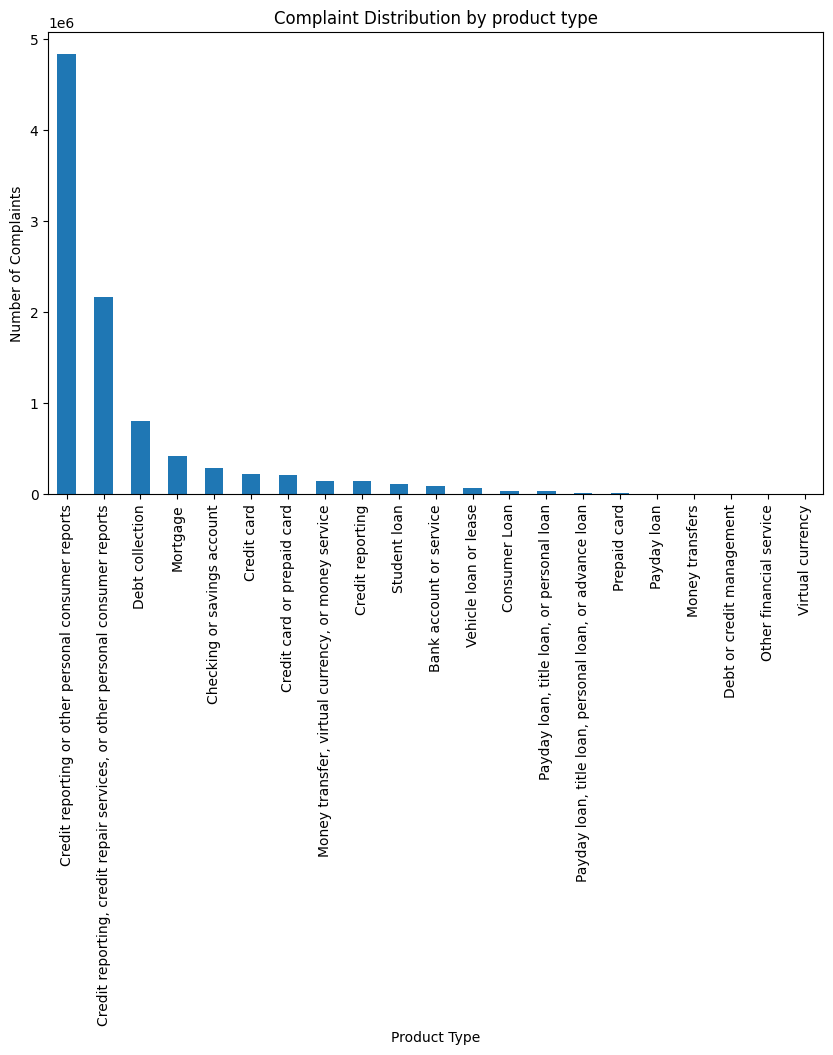

In [5]:
# nalyze the dictribution of complaint across different products
processer.plot_product_distribution()

**This visualization shows that:** 
* complaints related to "Credit reporting or other personal consumer reports" form the largest overall category. 
* This major category contains several specific sub-categories, including the prominently listed "Credit reporting, credit repair services..." and "Debt collection
* The other items listed (Mortgage, Credit Card, Student Loan, etc.) are separate, top-level product categories for complaints, but they are all subordinate in volume to the dominant "Credit reporting or other personal consumer reports" group

#### Calculate The Word Length of Narratives

In [6]:
processer.add_narative_length()

Added 'narrative_length' column.


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687,0
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688,0
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689,0
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690,0
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609792,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374,0
9609793,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858,0
9609794,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835,0
9609795,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118,0


#### Visualize The Length of Word Length

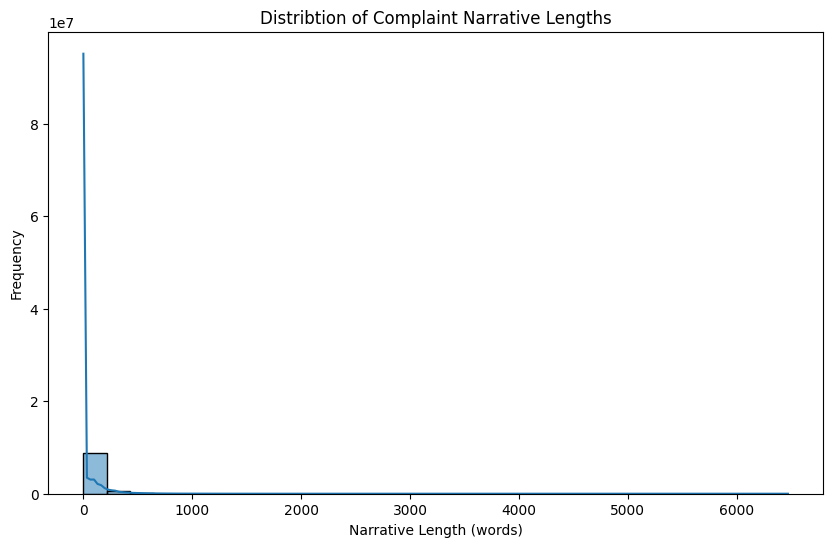

In [7]:
processer.plot_narrative_length_distribution()

#### Key Observation From the distribution plot:
**Most complaints are relatively short**. The highest frequency (likely the tallest bar) occurs at the lower end of the word count scale (towards 0-1000 words).

**The distribution is heavily right-skewed**. While the majority of narratives are concise, there is a long tail extending to much longer complaints (up to 6000 words).

**Extremely long narratives are rare**. The frequency drops significantly as the word count increases, meaning complaints exceeding several thousand words are uncommon outliers

#### Identify The Number of complaints with or wihtout narrative

In [8]:
processer.narrative_presence_stats()

Complaints with Narrative: 2980756
Complaints without Narrative: 6629041


#### Filter The Dataset 
* Include only records for the five specified products: Credit card, Personal loan, Savings account, and Money transfers.

In [9]:
processer.filter_product()

Filtered dataset to 226686 rows for target products.


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
334,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,75104,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196294,0
595,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,CA,92553,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196854,0
661,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77346,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196870,0
687,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,77346,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196880,0
795,2025-06-20,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",LA,71108,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609663,2012-06-08,Credit card,NaN,Late fee,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OK,73160,NaN,NaN,Web,2012-06-15,Closed with monetary relief,Yes,No,97839,0
9609682,2016-05-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,MI,47823,NaN,Consent not provided,Web,2016-05-01,Closed with explanation,Yes,Yes,1904635,0
9609689,2017-02-04,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,WA,54115,NaN,Consent not provided,Web,2017-02-04,Closed with explanation,Yes,No,2328055,0
9609727,2012-07-19,Credit card,NaN,Late fee,NaN,NaN,NaN,"CITIBANK, N.A.",CA,92673,Older American,NaN,Web,2012-07-20,Closed with monetary relief,Yes,No,120783,0


#### Remove Empty Narratives

In [10]:
processer.remove_empty_narratives()

d:\week-7 10academy\rag-complaint-chatbot\notebooks\..\src\eda.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.dropna(subset=["Consumer complaint narrative"],inplace=True)


Removed empty narrative rows. Remaining rows: 80667


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600696,2017-02-01,Credit card,NaN,APR or interest rate,NaN,My husband and I attended a XXXX XXXX XXXX tim...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,NJ,08610,NaN,Consent provided,Web,2017-02-01,Closed with monetary relief,Yes,No,2323561,224
9600751,2017-01-15,Credit card,NaN,Unsolicited issuance of credit card,NaN,I am an infrequent user of PayPal. I only use ...,NaN,"Paypal Holdings, Inc",IL,60126,NaN,Consent provided,Web,2017-01-18,Closed with explanation,Yes,No,2290909,399
9600903,2017-03-22,Credit card,NaN,Other,NaN,I have been doing business with Barclay Bank f...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,CT,06460,NaN,Consent provided,Web,2017-03-22,Closed with monetary relief,Yes,No,2400431,260
9601617,2015-10-16,Credit card,NaN,Credit determination,NaN,"Defamation of Character, False Credit Reportin...",NaN,JPMORGAN CHASE & CO.,MN,55987,NaN,Consent provided,Web,2015-10-16,Closed with explanation,Yes,Yes,1610424,444


#### Clean the text
* Cleaning  the text narratives to improve embedding quality like
    * lowering the text
    * removing spacial characters 
    * removing excess white space

In [11]:
processer.apply_text_cleaning()

##### Sve the data for later use

In [12]:
processer.save_processed_data("../data/processed/filtered_complaints.csv")

Processed data Saved to ../data/processed/filtered_complaints.csv


#### check for filtered data info

In [16]:
df=pd.read_csv("../data/processed/filtered_complaints.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80667 entries, 0 to 80666
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 80667 non-null  object
 1   Product                       80667 non-null  object
 2   Sub-product                   61830 non-null  object
 3   Issue                         80667 non-null  object
 4   Sub-issue                     61770 non-null  object
 5   Consumer complaint narrative  80667 non-null  object
 6   Company public response       39222 non-null  object
 7   Company                       80667 non-null  object
 8   State                         80412 non-null  object
 9   ZIP code                      80667 non-null  object
 10  Tags                          14639 non-null  object
 11  Consumer consent provided?    80667 non-null  object
 12  Submitted via                 80667 non-null  object
 13  Date sent to com